<a href="https://colab.research.google.com/github/cequintero/deep_learning/blob/main/Clasificador_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)


2.6.0


# Precarga de datos

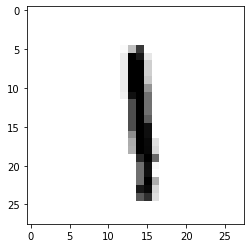

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

plt.imshow(x_train[8], cmap=plt.cm.binary) # Imprime la imagen en la posicion 8


In [3]:
print(y_train[8]) # imprime la etiqueta

1


# Muestra de datos

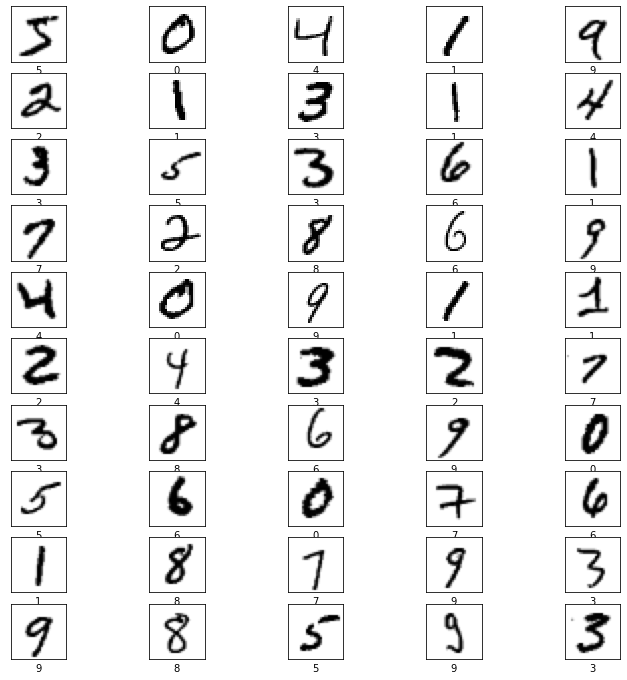

In [4]:
plt.figure(figsize=(12,12))
for i in range (50):
  plt.subplot(10,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[i], cmap=plt.cm.binary)
  plt.xlabel(y_train[i])
plt.show()

# Definicion del modelo



In [5]:
from keras.models import Sequential
from keras.layers  import Flatten
from keras.layers  import Dense

model = Sequential()
model.add(Flatten(input_shape=(28, 28))) # hace que la imagen se tome como un vector
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


# Configuracion aprendizaje 

In [6]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=10) # transformacion a vector de categorias para salida
y_test = to_categorical(y_test, num_classes=10)

print(y_train[0])

model.compile(loss="categorical_crossentropy",
              optimizer="sgd",
              metrics=['accuracy'])


[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


# Entrenamiento del modelo

In [7]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 1.4946 - accuracy: 0.6080
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.9977 - accuracy: 0.7500
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.8289 - accuracy: 0.7767
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.7506 - accuracy: 0.7843
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.7127 - accuracy: 0.7892


# Evaluacion del modelo

In [8]:
test_loss, test_acc = model.evaluate(x_test, y_test)

print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.6534 - accuracy: 0.8018
Test accuracy: 0.801800012588501


# Generacion de predicciones

1
[0.0038412  0.9450827  0.00332604 0.00272068 0.00844861 0.00766118
 0.00394496 0.00133383 0.01548214 0.00815864]


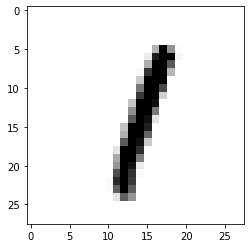

In [13]:
plt.imshow(x_test[5], cmap=plt.cm.binary) # imprime un parametro para la prediccion
predictions = model.predict(x_test)

print(np.argmax(predictions[5])) # deberia imprimir el correspondiente al parametro

print(predictions[5]) #arreglo con los porsentajes

